<a href="https://colab.research.google.com/github/sushily1997/ML_Assignments/blob/main/Advanced_Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Advanced Ensemble Techniques
3.1 Stacking

3.2 Blending

3.3 Bagging

3.4 Boosting

In [ ]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import seaborn as sns
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBClassifier
from vecstack import stacking

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/seeds_dataset.csv')
df

,Area,Perimeter,Compactness,Length_of_ kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,"Class_(1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length_of_ kernel        210 non-null    float64
 4   Width_of_kernel          210 non-null    float64
 5   Asymmetry_coefficient    210 non-null    float64
 6   Length_of_kernel_groove  210 non-null    float64
 7   Class_(1, 2, 3)          210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
# Build Machine Learning Model
#Lets create feature matrix X  and y labels
x = df.drop(('Class_(1, 2, 3)'),axis=1)
y = df['Class_(1, 2, 3)']

print('x shape=', x.shape)
print('y shape=', y.shape)

x shape= (210, 7)
y shape= (210,)


In [ ]:
df_min_max_scaled = x.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)


df2 = df_min_max_scaled

         Area  Perimeter  Compactness  Length_of_ kernel  Width_of_kernel  \
0    0.440982   0.502066     0.570780           0.486486         0.486101   
1    0.405099   0.446281     0.662432           0.368806         0.501069   
2    0.349386   0.347107     0.879310           0.220721         0.503920   
3    0.306893   0.316116     0.793103           0.239302         0.533856   
4    0.524079   0.533058     0.864791           0.427365         0.664291   
..        ...        ...          ...                ...              ...   
205  0.151086   0.163223     0.637024           0.134009         0.250178   
206  0.060434   0.097107     0.390200           0.135698         0.117605   
207  0.246459   0.258264     0.727768           0.189752         0.429081   
208  0.118036   0.165289     0.399274           0.155405         0.146828   
209  0.161473   0.192149     0.547187           0.193694         0.245189   

     Asymmetry_coefficient  Length_of_kernel_groove  
0                 0.1

In [ ]:
# copy the data
df_z_scaled = df.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
display(df_z_scaled)

,Area,Perimeter,Compactness,Length_of_ kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,"Class_(1, 2, 3)"
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663,-1.221825
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816,-1.221825
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357,-1.221825
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051,-1.221825
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223,-1.221825
...,...,...,...,...,...,...,...,...
205,-0.913333,-1.040834,0.308997,-1.109397,-0.734959,-0.046025,-1.094797,1.221825
206,-1.243264,-1.285864,-0.842110,-1.102626,-1.227395,0.415547,-0.824186,1.221825
207,-0.566218,-0.688602,0.732199,-0.885953,-0.070436,3.069254,-0.716349,1.221825
208,-1.033620,-1.033176,-0.799790,-1.023631,-1.118847,-0.067973,-0.740765,1.221825


In [ ]:
# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,Area,Perimeter,Compactness,Length_of_ kernel,Width_of_kernel,Asymmetry_coefficient,Length_of_kernel_groove,"Class_(1, 2, 3)"
0,0.720491,0.860290,0.948492,0.863371,0.821225,0.262654,0.796947,0.333333
1,0.702550,0.844638,0.959490,0.832060,0.826432,0.120388,0.756641,0.333333
2,0.674693,0.816812,0.985517,0.792659,0.827424,0.319182,0.736641,0.333333
3,0.653447,0.808116,0.975172,0.797603,0.837838,0.267148,0.733588,0.333333
4,0.762040,0.868986,0.983774,0.847640,0.883213,0.160241,0.790076,0.333333
...,...,...,...,...,...,...,...,...
205,0.575543,0.765217,0.956441,0.769588,0.739152,0.429399,0.743511,1.000000
206,0.530217,0.746667,0.926821,0.770037,0.693032,0.511471,0.763817,1.000000
207,0.623229,0.791884,0.967331,0.784419,0.801389,0.983325,0.771908,1.000000
208,0.559018,0.765797,0.927910,0.775281,0.703199,0.425497,0.770076,1.000000


**Evaluating model performance**

In [ ]:
df=df.sample(frac=1,random_state=3)
y=df['Class_(1, 2, 3)']
x=df.drop('Class_(1, 2, 3)',axis=1)

In [ ]:
print('x shape=', x.shape)
print('y shape=', y.shape)

x shape= (210, 7)
y shape= (210,)


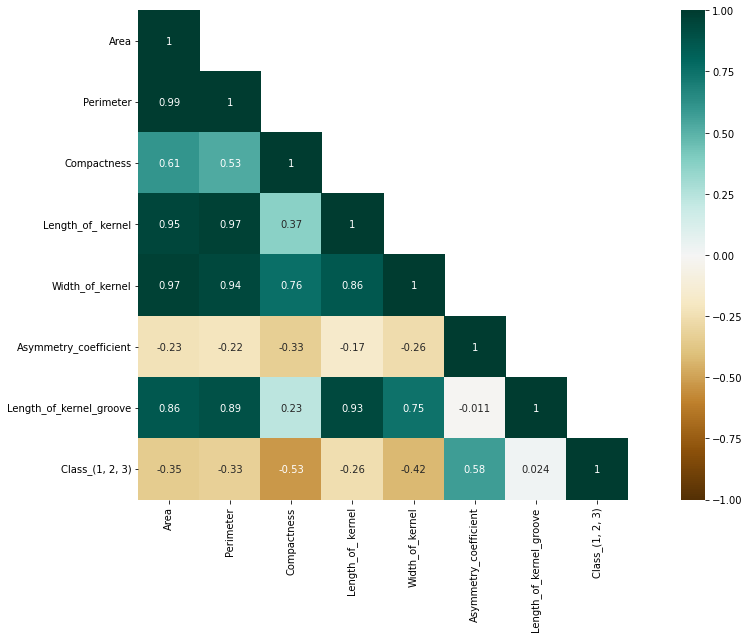

In [ ]:
# columns = copy.deepcopy(numeric_features)
# columns.append('y')
# data = df_train_org[columns]
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

**VIF**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#X = df[list(df.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif_info['Column'] = x.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,19479.829297,Perimeter
3,8025.164434,Length_of_ kernel
4,7906.280941,Width_of_kernel
2,5682.282348,Compactness
0,5096.572464,Area
6,1324.319458,Length_of_kernel_groove
5,9.453784,Asymmetry_coefficient


In [ ]:
X1 = x.drop(('Area'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_info['Column'] = X1.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,14302.294862,Perimeter
2,7884.976026,Length_of_ kernel
3,1877.466641,Width_of_kernel
5,1267.564264,Length_of_kernel_groove
1,240.249093,Compactness
4,8.906053,Asymmetry_coefficient


In [ ]:
X2 = X1.drop(('Perimeter'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif_info['Column'] = X2.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,2201.669795,Length_of_ kernel
4,1221.112983,Length_of_kernel_groove
2,291.250086,Width_of_kernel
0,235.902604,Compactness
3,8.793308,Asymmetry_coefficient


**split test and train data**

In [ ]:
#Split the test and train data:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state= 1)
print('x_train dimension= ', x_train.shape)
print('x_test dimension= ', x_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_test dimension= ', y_test.shape)

x_train dimension=  (126, 7)
x_test dimension=  (84, 7)
y_train dimension=  (126,)
y_test dimension=  (84,)


**Model fitting**

In [ ]:
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(x_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
cls.score(x_test, y_test)

0.8809523809523809

In [ ]:
#Creating the classifier object:
clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=5, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [ ]:
#On test
y_pred = clf_gini.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.88      0.89        32
           2       1.00      0.92      0.96        26
           3       0.86      0.96      0.91        26

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.92        84



In [ ]:
#specifying the initial learners
model1 = RandomForestClassifier()
model2 = LogisticRegression()
model3 = xgb.XGBClassifier()

#training the initial learners
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


XGBClassifier(objective='multi:softprob')

In [ ]:
#making predictions for the validation data
preds1 = model1.predict(x_test)
preds2 = model2.predict(x_test)
preds3 = model3.predict(x_test)

#making predictions for the test data
test_preds1 = model1.predict(x_test)
test_preds2 = model2.predict(x_test)
test_preds3 = model3.predict(x_test)

In [ ]:
#making a new dataset for training our final model by stacking the predictions on the validation data
train_stack = np.column_stack((preds1,preds2,preds3))

#making the final test set for our final model by stacking the predictions on the test data
test_stack = np.column_stack((test_preds1,test_preds2,test_preds3))

In [ ]:
print(train_stack)

[[2 2 2]
 [3 3 3]
 [3 1 3]
 [1 1 1]
 [1 1 1]
 [1 2 1]
 [2 2 2]
 [1 1 1]
 [3 3 3]
 [1 2 1]
 [3 3 3]
 [2 2 2]
 [2 2 2]
 [3 3 3]
 [1 1 1]
 [2 2 2]
 [3 1 3]
 [2 1 2]
 [1 1 1]
 [1 1 1]
 [2 2 2]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [3 3 3]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [2 2 2]
 [3 3 3]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [3 3 3]
 [3 3 3]
 [1 1 1]
 [3 3 3]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [2 2 2]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [2 2 2]
 [1 1 1]
 [3 3 3]
 [1 1 1]
 [1 1 1]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [3 3 3]
 [3 3 3]
 [1 1 1]
 [3 3 3]
 [1 1 1]
 [3 3 3]
 [3 3 3]
 [2 2 2]
 [2 2 2]
 [3 3 3]
 [1 1 1]
 [3 3 3]
 [2 2 2]
 [2 2 2]
 [2 2 2]
 [1 1 1]
 [1 1 1]
 [2 2 2]
 [1 1 1]
 [1 1 1]
 [2 2 2]
 [2 2 2]
 [1 1 1]
 [2 2 2]
 [3 3 3]
 [1 1 3]]


In [ ]:
final_model = RandomForestClassifier()

#training the final model on the stacked predictions
final_model.fit(train_stack,y_pred)

RandomForestClassifier()

In [ ]:
final_model.score(train_stack,y_pred)

0.9523809523809523

In [ ]:
final_predictions = final_model.predict(test_stack)
print(final_predictions)

[2 3 3 1 1 1 2 1 3 1 3 2 2 3 1 2 3 2 1 1 2 1 2 3 3 1 2 3 2 3 1 1 1 1 3 3 1
 3 1 2 3 2 3 3 3 1 2 3 3 3 2 1 3 1 1 1 2 3 3 3 1 3 1 3 3 2 2 3 1 3 2 2 2 1
 1 2 1 1 2 2 1 2 3 3]


In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred_train = regressor.predict(x_train)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[38  0  0]
 [ 0 44  0]
 [ 0  0 44]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_test = regressor.predict(x_test)

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[31  0  1]
 [ 3 23  0]
 [ 0  0 26]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print ("Accuracy : ",accuracy_score(y_test,y_pred_test)*100)
	
print("Report : ",classification_report(y_test, y_pred_test))

Accuracy :  95.23809523809523
Report :                precision    recall  f1-score   support

           1       0.91      0.97      0.94        32
           2       1.00      0.88      0.94        26
           3       0.96      1.00      0.98        26

    accuracy                           0.95        84
   macro avg       0.96      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



**Stacking**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
KNC = KNeighborsClassifier()   # initialising KNeighbors Classifier
NB = GaussianNB()              # initialising Naive Bayes
model_kNeighborsClassifier = KNC.fit(x_train, y_train)   # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(x_test)   # Predicting on test dataset
acc_knc = accuracy_score(y_test, pred_knc)  # evaluating accuracy score
print('accuracy score of KNeighbors Classifier is:', acc_knc * 100)

accuracy score of KNeighbors Classifier is: 86.90476190476191


In [ ]:
model_NaiveBayes = NB.fit(x_train, y_train)
pred_nb = model_NaiveBayes.predict(x_test)

In [ ]:
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', acc_nb * 100)

Accuracy of Naive Bayes Classifier: 88.09523809523809


In [ ]:
from sklearn.ensemble import StackingClassifier

lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(estimators =[KNC, NB], final_estimator = lr)
print(clf_stack)

StackingClassifier(estimators=[KNeighborsClassifier(), GaussianNB()],
                   final_estimator=LogisticRegression())


In [ ]:
models = [KNeighborsClassifier(n_neighbors=5,n_jobs=-1),
    RandomForestClassifier(random_state=0, n_jobs=-1,n_estimators=100, max_depth=3),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,n_estimators=100, max_depth=3)]

In [ ]:
x_train, x_test = stacking(
    models,x_train, y_train, x_test,regression=False,mode='oof_pred_bag',
                           needs_proba=False,save_dir=None,metric=accuracy_score,
                           n_folds=5,stratified=True,shuffle=True,random_state=0,verbose=2
                           )

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.84615385]
    fold  1:  [0.88000000]
    fold  2:  [0.92000000]
    fold  3:  [0.92000000]
    fold  4:  [0.92000000]
    ----
    MEAN:     [0.89723077] + [0.02986994]
    FULL:     [0.89682540]

model  1:     [RandomForestClassifier]
    fold  0:  [0.88461538]
    fold  1:  [0.80000000]
    fold  2:  [0.96000000]
    fold  3:  [1.00000000]
    fold  4:  [0.96000000]
    ----
    MEAN:     [0.92092308] + [0.07106027]
    FULL:     [0.92063492]

model  2:     [XGBClassifier]
    fold  0:  [0.80769231]
    fold  1:  [0.92000000]
    fold  2:  [0.88000000]
    fold  3:  [1.00000000]
    fold  4:  [0.96000000]
    ----
    MEAN:     [0.91353846] + [0.06633892]
    FULL:     [0.91269841]



**Blending**

In [ ]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,n_estimators=100, max_depth=3)
model = model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.90476190]


In [ ]:
model_1 = tree.DecisionTreeClassifier()
model_1.fit(x_train, y_train)
#holdout_pred_1=model_1.predict(X_test)
test_pred_1=model_1.predict(x_test)
#holdout_pred_1=pd.DataFrame(holdout_pred_1)
test_pred_1=pd.DataFrame(test_pred_1)

model_2 = KNeighborsClassifier()
model_2.fit(x_train,y_train)
#holdout_pred_2=model_2.predict(x_val)
test_pred_2=model_2.predict(x_test)
#holdout_pred_2=pd.DataFrame(holdout_pred_2)
test_pred_2=pd.DataFrame(test_pred_2)
X_test=pd.DataFrame(x_test)

In [ ]:
df_test=pd.concat([test_pred_1,test_pred_2],axis=1)

model = LogisticRegression()
model.fit(df_test,y_test)
model.score(df_test,y_test)

0.9047619047619048

**Boosting**

In [ ]:

x = x
y = y
 
# Fitting XGBoost to the training data
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
 
# Predicting the Test set results
y_pred = model.predict(x_test)

 
# Making the Confusion Matrix
C_Matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(C_Matrix)

[[26  1  5]
 [ 2 24  0]
 [ 0  0 26]]


In [ ]:
accuracy_score(y_test, y_pred)

0.9047619047619048